### Import Libraries

In [1]:
from preprocess import *
from data import *
from visualization import *
from data import *
import numpy as np

### Read data and preprocess

In [2]:
EUR_future_1min, EUR_1min, EUR_1day = read_data()

In [3]:
EUR_future_1min = preprocess_EUR_future_1min(EUR_future_1min)
EUR_1min = preprocess_EUR_1min(EUR_1min)
EUR_1day = preprocess_EUR_1day(EUR_1day)

### Visualize raw data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E43603668>,
      dtype=object)

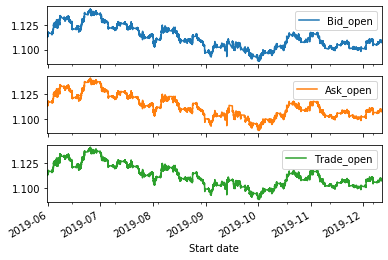

In [4]:
plot(df=EUR_1min)

### Data manipulation

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E58470240>],
      dtype=object)

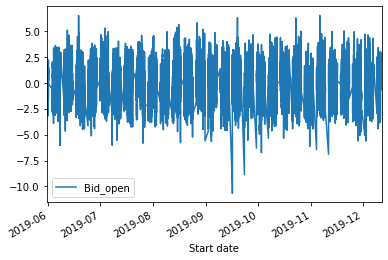

In [5]:
detrended_EUR_1min = detrend(df=EUR_1min, col_name='Bid_open', window_size=365)
plot(detrended_EUR_1min)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E58532208>],
      dtype=object)

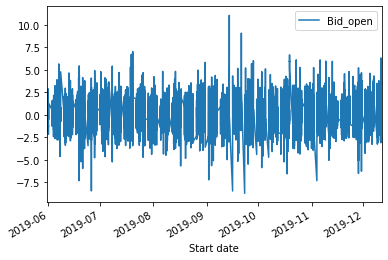

In [6]:
lagged_detrended_EUR_1min = lag_differenced(df=detrended_EUR_1min, col_name='Bid_open', lag=10)
plot(lagged_detrended_EUR_1min)

### Visualize seasonal decomposition

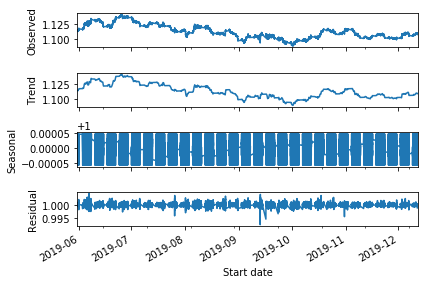

In [7]:
decomposed = seasonal_decompose(df=EUR_1min, col_name='Bid_open', freq=365, model='multiplicative')

### Visualize rolling statistics

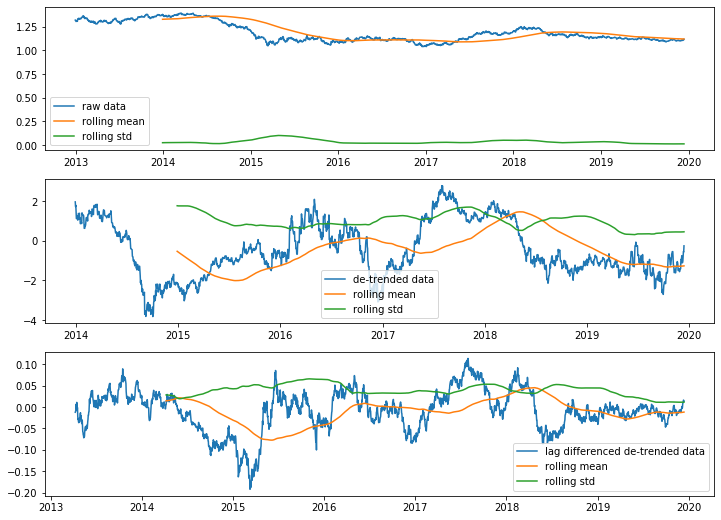

In [8]:
fig = plot_rolling_statistics(df=EUR_1day, col_name='PX_BID', window_size=365, lags=100)

### Visualize acf and pacf

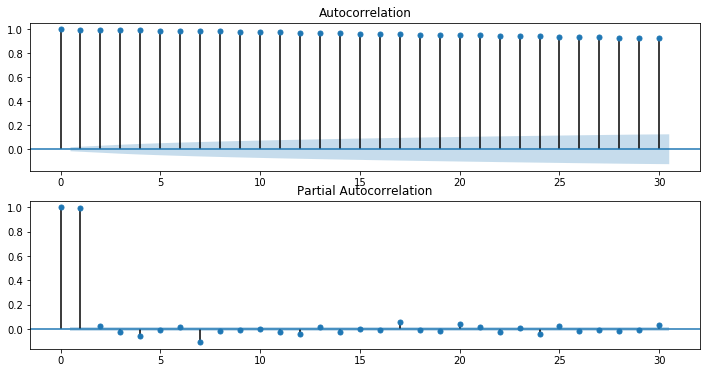

In [9]:
fig = plot_acf_pacf(df=EUR_future_1min, col_name='Bid_open', lags=30)

### Stationarity check

In [10]:
adfuller_test(df=EUR_1min,col_name='Bid_open', window_size=365, lags=12)

 > Is the data stationary ?
Test statistic = -1.788
P-value = 0.386
Critical values :
	1%: -3.430382080957372 - The data is not stationary with 99% confidence
	5%: -2.861554179360146 - The data is not stationary with 95% confidence
	10%: -2.5667775471633654 - The data is not stationary with 90% confidence

 > Is the de-trended data stationary ?
Test statistic = -27.978
P-value = 0.000
Critical values :
	1%: -3.4303821336102422 - The data is  stationary with 99% confidence
	5%: -2.8615542026318943 - The data is  stationary with 95% confidence
	10%: -2.566777559550102 - The data is  stationary with 90% confidence

 > Is the lag differenced de-trended data stationary ?
Test statistic = -49.938
P-value = 0.000
Critical values :
	1%: -3.43038208347573 - The data is  stationary with 99% confidence
	5%: -2.861554180473221 - The data is  stationary with 95% confidence
	10%: -2.5667775477558163 - The data is  stationary with 90% confidence
